### Adquisicion de los datos de la competicion (Proceso en kaggle)

1.   Acceder o logiarse en una cuenta en kaggle, crear y adquirir un token de la API, con esto se consigue el archivo JSON para nuestras credenciales en kaggle de acuerdo a nuestra cuenta (https://www.youtube.com/watch?v=57N1g8k2Hwc)

2.   Se debe ir a Kaggle y entrar a link de la competicion para poder ver el dataset, luego se debe aceptar las reglas de participacion porque de otra forma no se podra acceder o hacer peticion para descargar el dataset, luego envian codigo de verificacion al celular y por ultimo te permiten acceder a los datos.

### Importacion de librerias

In [1]:
# Librerias para el pre-procesamiento
from pathlib import Path # Es una biblioteca que facilita el manejo de rutas y directorios.
import numpy as np # Es una biblioteca utilizado para operaciones numéricas y manipulación de matrices.
import cv2 # Es una biblioteca que proporciona funciones para procesar imágenes. 
import pandas as pd # Es una biblioteca de manipulación y análisis de datos. 
import matplotlib.pyplot as plt # Es una biblioteca de visualización para crear gráficos y trazados.
from tqdm.notebook import tqdm # Es una biblioteca que proporciona una barra de progreso agradable para mostrar el progreso de bucles y tareas.

# Librerias para el entrenamiento
import torch # Proporciona funcionalidades para la creación y el entrenamiento de modelos
import torchvision # Ofrece una amplia gama de conjuntos de datos y transformaciones para el procesamiento de imágenes. 
from torchvision import transforms # Para aplicar transformaciones a los datos
import torchmetrics # Para calcular métricas de evaluación del modelo
import pytorch_lightning as pl # Para entrenar y evaluar modelos de manera más eficiente. 
from pytorch_lightning.callbacks import ModelCheckpoint # Para guardar los puntos de control (Modelos, pesos, ...) del modelo durante el entrenamiento, y reutilizarlos si es necesario.
# from tqdm.notebooks import tqdm. Error por agregar una s en la palabra notebook
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os # Libreria para interactuar con el sistema operativo

# Librerias para la interpretacion
%matplotlib notebook 
import torch
import torchvision
from torchvision import transforms
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt

### Preparacion del entorno para la union con kaggle (https://www.youtube.com/watch?v=57N1g8k2Hwc)

(https://platzi.com/tutoriales/1794-pandas/6926-usando-la-api-de-kaggle-con-google-colab-para-carga-y-descarga-de-datasets/)

In [2]:
"""Instalacion de Kaggle API library de manera silenciosa (-q = quiet), sin detalles / 
Nos va a permitir acceder a la plataforma Kaggle para poder descargar conjuntos de datos alojadas en Kaggle.
(https://www.kaggle.com/docs/api)"""
!pip install -q kaggle  

### Cargar JSON con las credenciales de Kaggle

##### 1) Desde lo local o drive

In [3]:
#Carga del JSON
from google.colab import files, drive  #  Importando el sistema de archivos y drive que nos provee colab
                                # para poder cargar el archivo JSON ya sea desde lo local o desde el drive

files.upload() # Para subir archivos alojados en el entorno local de mi maquina
# drive.mount("/content/drive") # Para montar el drive y disponer de los archivos alojados en el drive

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josegalindo23","key":"f9758a100adba47163680cb133033981"}'}

##### Desde github: (https://docs.github.com/es/repositories/working-with-files/managing-files/adding-a-file-to-a-repository  



In [ ]:
import requests # Libreria para hacer peticiones a webs
import json

url = "URL_DEL_ARCHIVO_EN_GITHUB" #URL del archivo en GitHub

response = requests.get(url)
json.loads(response.text)

In [4]:
!mkdir ~/.kaggle #Creamos una carpeta oculta en el sistema de archivos con el nombre .kaggle. 
!cp kaggle.json ~/.kaggle/ #Copiamos el archivo de credenciales que subimos a la carpeta que creamos previamente.
!chmod 600 ~/.kaggle/kaggle.json # Cambiamos los permisos para permitir lectura de las credenciales.

In [5]:
""" (https://www.kaggle.com/docs/api)
path_dataset_copy = "" # Ruta copiada desde la competicion (Copy API command to clipboard)
Descargar un conjunto de datos específico desde Kaggle utilizando la herramienta de línea de comandos de Kaggle.
"""
!kaggle competitions download -c rsna-pneumonia-detection-challenge

100% 3.66G/3.66G [01:40<00:00, 38.3MB/s]
100% 3.66G/3.66G [01:40<00:00, 39.1MB/s]


In [6]:
# Descomprimir el archivo .zip en todo el content
!unzip /content/rsna-pneumonia-detection-challenge.zip

# # Descomprimir el archivo .zip en una carpeta llamada dataset_folder
# !unzip /content/rsna-pneumonia-detection-challenge.zip -d dataset_folder
# import os
# dataset_files = os.listdir('dataset_folder')
# print("Archivos del dataset:", dataset_files)

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: st

In [7]:
# Se instancia un objeto de tipo DataFrame llamado labels que contiene las etiquetas de los datos
labels = pd.read_csv("/content/stage_2_train_labels.csv")

In [8]:
labels.head(6) # Muestra en una tabla las primeras 6 filas del Dataframe labels 

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [9]:
# Remueve las etiquetas repetidas de la columna "patientId"
labels = labels.drop_duplicates("patientId")

In [10]:
labels.head() # Muestra en una tabla las primeras 5 filas del Dataframe labels 

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [11]:
ROOT_PATH = Path("/content/stage_2_train_images") # Ruta de imagenes DICOM
SAVE_PATH = Path("/content/Processed_npy_files/") # Ruta para guardar archivos npy procesados
# NPY = son un formato de archivo utilizado para almacenar matrices o arreglos multidimensionales en Python.

In [12]:
# instalar la biblioteca "pydicom" para proporcionr funciones y clases para leer, escribir y manipular archivos DICOM.
!pip install pydicom
import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.3 MB/s eta 0:00:00


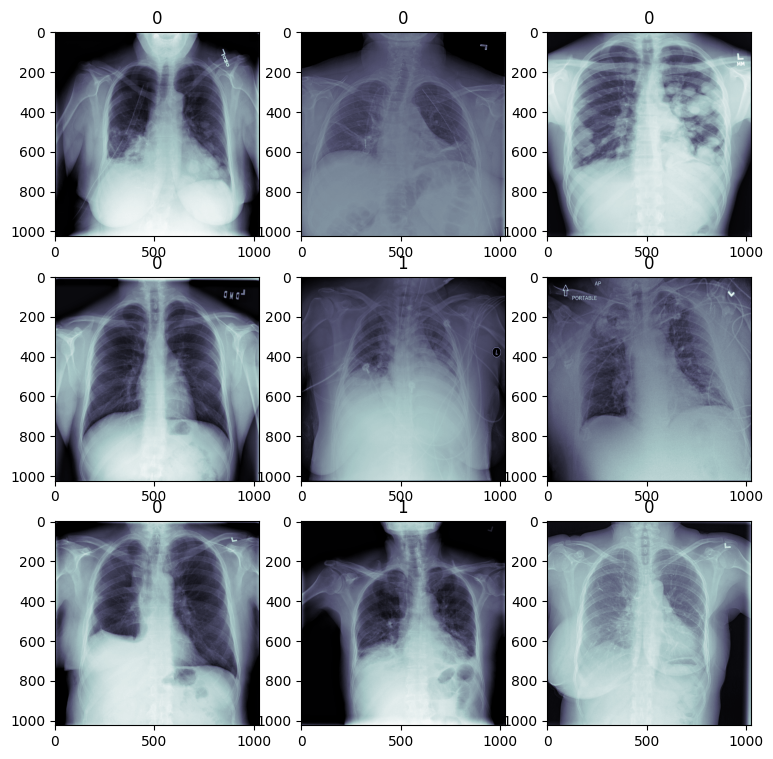

In [14]:
""" ERROR 1 
El error se debe a que se estaba usando loc en vez de iloc, con loc debiamos acceder 
con etiquetas de fila y columna; como estamos accediendo a traves del contador c,
se debe utilizar iloc que accede a traves de indices basados en la posicion
(https://www.analyticslane.com/2023/02/06/diferencias-entre-loc-e-iloc-en-pandas/)

ERROR 2
Error en el paleta de colores(cmap), cambio de boned a bone
"""
fig, axis = plt.subplots(3, 3, figsize=(9, 9)) # crea una figura y un conjunto de subfiguras
# en una cuadrícula de 3 filas y 3 columnas, con un tamaño de figura de 9 pulgadas por 9 pulgadas.
# retorna el objeto de la figura y sus ejes
c = 0 # inicializacion del contador en cero
for i in range(3): # Recorrer filas
    for j in range(3): # Recorrer columnas
        patient_id = labels.patientId.iloc[c] #Para cada iteración del bucle, se asigna la etiqueta de patientId a la variable patient_id utilizando el índice c.
        dcm_path = ROOT_PATH/patient_id # Se junta o concatena la ruta principal donde estan todas las imagenes con la etiqueta almacenada en patient_id
        dcm_path = dcm_path.with_suffix(".dcm") # Se completa la ruta añadiendo la extension .dcm
        dcm = pydicom.read_file(dcm_path).pixel_array # Lee er archivo dicom correspondiente, accede al arreglo de píxeles y los retorna a dcm
        
        #selecciona el valor de la columna "Target" en esa fila de  posición c y lo almacena en label.
        label = labels["Target"].iloc[c] # Error en esta linea, cambio a iloc
        
        # Muestra en la figura el arreglo de pixeles para cada eje con paleta de color hueso
        axis[i][j].imshow(dcm, cmap="bone") #Error en el paleta de colores(cmap)
        axis[i][j].set_title(label) # titula cada subfigura con la etiqueta, con signos de neumonia (1), sin signos de neumonia (0)
        c+=1 # aumento del contador


In [15]:
sums = 0 # Inicializacion de la variable sums en 0, sumas
sums_squared = 0 # Inicializacion de la variable sums_squared en 0, cuadrado de sumas

for c, patient_id in enumerate(tqdm(labels.patientId)): # Bucle para iterar sobre los valores de labels.patientId. 
#La variable c almacenara el indice, mientras que patient_id toma el valor actual de labels.patientId en cada iteración.
# tqdm se utiliza para agregar una barra de progreso al bucle for, lo que permite visualizar el progreso del bucle mientras se ejecuta. 

    #Conformacion de la ruta para cada paciente segun el orden de iteracción
    patient_id = labels.patientId.iloc[c] #Sol. Error = Linea de codigo faltante para poder armar bien la ruta
    dcm_path = ROOT_PATH/patient_id  
    dcm_path = dcm_path.with_suffix(".dcm") # Sol. Error por haber omitido una f en suffix

    # Lectura del DICOM, acceso, almacenamiento del arreglo normalizado con el maximo valor del pixel, entre 0 y 1
    dcm = pydicom.read_file(dcm_path).pixel_array / 255  
        
    # Resize the image as 1024x1024 is way to large to be handeled by Deep Learning models at the moment
    # Let's use a shape of 224x224
    # In order to use less space when storing the image we convert it to float16
    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16) #Error en la redimension del ancho, 223 -> 224 
                                                                # y en añadir una d en la palabra astype 
    
    # Retrieve the corresponding label
    label = labels.Target.iloc[c] # Nuevamente se repite el error de la celda anterior, loc -> iloc
    
    # 4/5 train split, 1/5 val split -> Separacion de datos 80% train & 20% val
    train_or_val = "train" if c < 24000 else "val" 
    
    # Define save path and create if necessary
    current_save_path = SAVE_PATH/train_or_val/str(label) #Arma la ruta donde se almacenarían los archivos npy procesados, 
                                                          #diferenciados por el conjunto (train o val) segun sea el caso y la etiqueta correspondiente.
    current_save_path.mkdir(parents=True, exist_ok=True) # Crea una carpeta si no existe asegurándose de que los directorios padres se creen si no existen 
                                                          # y evitando errores si el directorio ya existe.
    np.save(current_save_path/patient_id, dcm_array)  # Guardar el arreglo dcm_array en un archivo .npy en la ruta especificada
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Normalize sum of image, normalizer = 224 * 224
    if train_or_val == "train":  # Only use train data to compute dataset statistics
        sums += np.sum(dcm_array) / normalizer #calcula la suma de los valores de los píxeles, para hallar la media 
                                                # Error porque numpy no tiene suma, es sum
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer #calcula la suma de los valores de los píxeles al cuadrado, para hallar la desviación estándar  
                                                                      # Error por añadir un igual (=) de más

  0%|          | 0/26684 [00:00<?, ?it/s]

In [16]:
mean = sums / 24000 # Calculo de la media
std = np.sqrt(sums_squared / 24000 - (mean**2)) # Calculo de la desviación estándar
print(f"Mean of Dataset: {mean}, STD: {std}") # visualización de los valores

Mean of Dataset: 0.4903962485384803, STD: 0.24795070634161256


In [17]:
!pip install -q torchmetrics # Instalación de biblioteca que proporciona métricas de evaluación con PyTorch. 
!pip install -q pytorch_lightning # Instalación de biblioteca de alto nivel para entrenar modelos de aprendizaje profundo en PyTorch.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.4 MB/s eta 0:00:00


In [19]:
# Declaracion de una funcion para archivo NPY
def load_file(path):
    return np.load(path).astype(np.float32) #Carga el archivo NPY desde la ruta y que sea de tipo float32

In [20]:
train_transforms = transforms.Compose([
                                    transforms.ToTensor(),  # Convert numpy array to tensor (aprovechar las capacidades de cómputo y optimización de PyTorch)
                                    # transforms.Normalize(0.49, 0.248),  # Use mean and std from preprocessing notebook
                                    transforms.Normalize(mean, std),  # Use mean and std from preprocessing notebook
                                    transforms.RandomAffine(degrees=(-5, 5), translate=(0, 0.05), scale=(0.9, 1.1)), # Data Augmentation 
                                    # (aplica una combinación aleatoria de rotación, traslación y escala a la imagen de acuerdo a los rangos establecidos)
                                    transforms.RandomResizedCrop((224, 224), scale=(0.35, 1)) #Esta transformación recorta aleatoriamente y redimensiona
                                                                                              # la imagen de entrada a un tamaño específico.

])

val_transforms = transforms.Compose([
                                    transforms.ToTensor(),  # Convert numpy array to tensor 
                                    # transforms.Normalize([0.49], [0.248]),  # Use mean and std from preprocessing notebook
                                    transforms.Normalize([mean], [std]) # normaliza el tensor de imagen utilizando la media 
                                                                        # y desviación estándar especificadas.
])




In [21]:
#Error en torch_vision, funciona si se le quita el guión bajo (_)
# Ademas hay que agregar las rutas
train_dataset = torchvision.datasets.DatasetFolder( # Se crea el objeto de tipo DatasetFolder que representa el conjunto de datos de entrenamiento 
    "/content/Processed_npy_files/train",           # usando la ruta especifica de los archivos y aplicando las funciones de carga y transformacion
    loader=load_file, extensions="npy", transform=train_transforms) # Definidas previamente

val_dataset = torchvision.datasets.DatasetFolder( # Se crea el objeto de tipo DatasetFolder que representa el conjunto de datos de validacion
    "/content/Processed_npy_files/val",         # usando la ruta especifica de los archivos y aplicando las funciones de carga y transformacion
    loader=load_file, extensions="npy", transform=val_transforms) # Definidas previamente

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


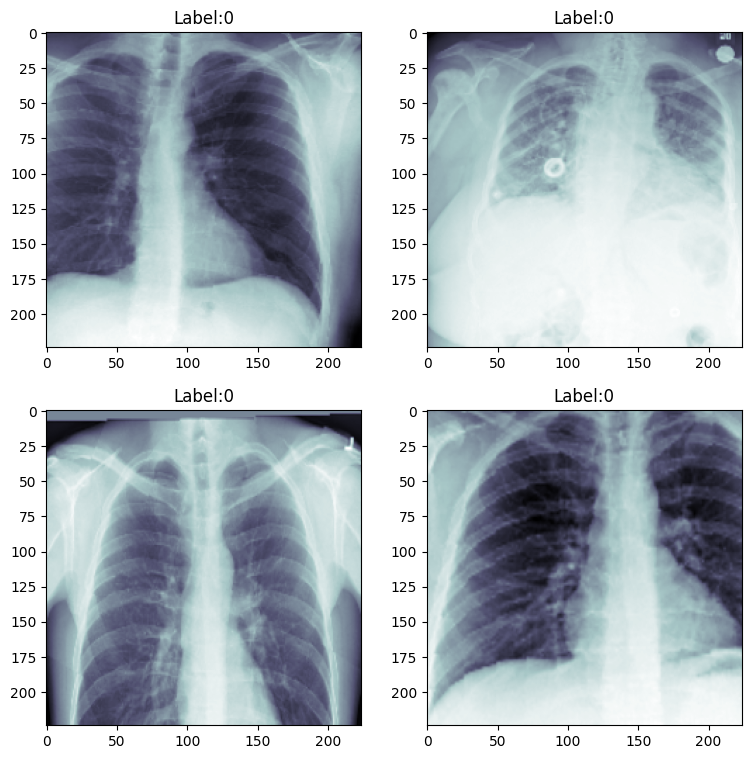

In [22]:
fig, axis = plt.subplots(2, 2, figsize=(9, 9))
for i in range(2):
    for j in range(2): #Error en el numero de iteracciones de columnas, 3 -> 2
        random_index = np.random.randint(0, 20000) # Se genera un numero aleatorio entre 0 y 19999
        x_ray, label = train_dataset[random_index] # Accede a una muestra específica del conjunto de datos de entrenamiento utilizando 
                                                  # el índice aleatorio generado y retorna una tupla que contiene la imagen de rayos y su etiqueta
        axis[i][j].imshow(x_ray[0], cmap="bone")
        axis[i][j].set_title(f"Label:{label}")

In [23]:
""" DataLoader (https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)
Clase esencial en PyTorch para cargar y preparar los datos de manera eficiente durante el entrenamiento y evaluación de modelos
"""
batch_size = 64#TODO, para evitar errores añadimos el guión bajo(_), tamaño del lote para particionar el conjunto de datos
num_workers = 4# TODO, No. Subprocesos para la manejo de datos en paralelo, acelerar el tiempo de carga de los datos y mejorar el rendimiento general del entrenamiento.

# Objeto DataLoader que se utilizará para iterar sobre los datos de entrenamiento en lotes durante el entrenamiento del modelo. (Revolviendo los datos)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True) # Para evitar errores se coloca guion bajo(_)
# Objeto DataLoader que se utilizará para iterar sobre los datos de validación en lotes durante la evaluación del modelo. (Sin revolver los datos)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=False)

print(f"There are {len(train_dataset)} train images and {len(val_dataset)} val images") # Visualizacion del tamaño de datos de train y test

There are 24000 train images and 2684 val images


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [24]:
# Para obtener los valores únicos y sus recuentos en las etiquetas de los conjuntos de datos de entrenamiento y validación.
np.unique(train_dataset.targets, return_counts=True), np.unique(val_dataset.targets, return_counts=True)

((array([0, 1]), array([18593,  5407])), (array([0, 1]), array([2079,  605])))

In [25]:
""" SELF
self se utiliza para referirse a un instancia o atributo
dentro de los métodos de una clase, lo que permite acceder métodos de la clase.
Es como si permitiera hacer uso de la instancio o atributo de manera global  dentro de la clase
"""
class PneumoniaModel(pl.LightningModule): # Se crea una subclase PneumoniaModel que hereda los metodos y atributos de la clase pl.LightningModule
    def __init__(self, weight=1): # metodo para inicializar los atributos 
        super().__init__() #Para realizar la heredacion, Esto asegura que los atributos heredados de la clase padre 
                          #se inicialicen correctamente antes de realizar cualquier inicialización adicional específica de la subclase.

        self.model = torchvision.models.resnet18() # crea una instancia del modelo pre-entrenado ResNet-18 

        # change conv1 from 3 to 1 input channels
        ##Realizar operaciones de convolución en las imágenes, con un canal de entrada, 64 caracteristicas de salida, con filtro de 7x7
        ##con desplazamiento de 2 y relleno de 3 tanto en x como en y. Sin sesgo en la capa
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) 
        
        # change out_feature of the last fully connected layer (called fc in resnet18) from 1000 to 1
        # Realizar una transformación lineal de los 512 datos de entrada y se cambia para que tenga una sola unidad de salida
        # para una tarea de clasificación binaria.
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1)
        
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4) # Configuracion del optimizador Adam
        self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight])) # Configura la función de pérdida utilizada en el modelo con peso 1
        
        # simple accuracy computation
        #Sol. Error, torchmetrics.Accuracy espera que le pases al menos un parametro, en este caso binary, porque necesitamos clasificar entre 2 clases
        # (https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html)
        self.train_acc = torchmetrics.Accuracy(task='binary')#crea una instancia de la métrica Accuracy al conjunto de entrenamiento para dar seguimiento
        self.val_acc = torchmetrics.Accuracy(task='binary') #crea una instancia de la métrica Accuracy al conjunto de validacion para dar seguimiento

    def forward(self, data): #Define funcion que recibe data como entrada
        pred = self.model(data) #Pasa los datos a través de las capas del modelo y realizar las operaciones necesarias para generar las predicciones.
        return pred # Retorna predicciones generadas 
    
    def training_step(self, batch, batch_idx): # crea funcion training_step que recibe batch y batch_idx(indice)
        x_ray, label = batch # Desempaqueta el lote en x_ray y label
        label = label.float()  # Convert label to float (just needed for loss computation)
        pred = self(x_ray)[:,0]  # Prediction: Make sure prediction and label have same shape
        loss = self.loss_fn(pred, label)  # Compute the loss
        
        # Log loss and batch accuracy
        self.log("Train Loss", loss) # registra el valor de la pérdida de entrenamiento
        self.log("Step Train Acc", self.train_acc(torch.sigmoid(pred), label.int())) # se calcula y registra la precisión de entrenamiento 
        return loss # Retorna el valor de la pérdida
    
# Error en la heredacion del metodo training_epoch_end, ya que fue eliminado y no funciona a partir de la version 2.0.0
# Sol. utilizar on_train_epoch_end y ya no recibe el parámetro outs de forma explícita. 
# En cambio, se espera que accedas a las salidas (outputs) relevantes desde los atributos de instancia que hayas guardado durante el entrenamiento.
    def on_train_epoch_end(self):
        # After one epoch compute the whole train_data accuracy
        self.log("Train Acc", self.train_acc.compute()) #para registrar la precisión en el entrenamiento.
               
    def validation_step(self, batch, batch_idx):
        # Same steps as in the training_step
        x_ray, label = batch
        label = label.float()
        pred = self(x_ray)[:,0]  # make sure prediction and label have same shape

        loss = self.loss_fn(pred, label)
        
        # Log validation metrics
        self.log("Val Loss", loss)
        self.log("Step Val Acc", self.val_acc(torch.sigmoid(pred), label.int()))
        return loss

# Error en la heredacion del metodo validation_epoch_end, ya que fue eliminado y no funciona a partir de la version 2.0.0
# Sol. utilizar  on_validation_epoch_end y ya no recibe el parámetro outs de forma explícita. 
# En cambio, se espera que accedas a las salidas (outputs) relevantes desde los atributos de instancia que hayas guardado durante el entrenamiento.

    def on_validation_epoch_end(self):
        self.log("Val Acc", self.val_acc.compute())
    
    def configure_optimizers(self):
        #Caution! You always need to return a list here (just pack your optimizer into one :))
        return [self.optimizer] # Retorna el optimizador que se utilizará para actualizar los parámetros del modelo durante el entrenamiento en forma de lista



In [26]:
model = PneumoniaModel()  # Instanciate the model

In [27]:
# Create the checkpoint callback
checkpoint_callback = ModelCheckpoint( # permite guardar los mejores modelos durante el entrenamiento.
    monitor='Val Acc', # Especifica la métrica que se va a monitorear
    save_top_k=10, #Especifica cuántos de los mejores modelos se deben guardar
    mode='max') # Indica que se busca maximizar la métrica "Val Acc".

In [28]:
# !pip install lightning
pl.__version__ # Version descargada de PyTorch Lightning

'2.0.2'

In [29]:
#Para conocer el numero de GPUs que tiene colab free
num_gpu = torch.cuda.device_count()
print("Número de GPUs disponibles:", num_gpu)


Número de GPUs disponibles: 1


In [30]:
# Create the trainer
# Change the gpus parameter to the number of available gpus on your system. Use 0 for CPU training

#Error, se debe importar la siguiente libreria
from pytorch_lightning.loggers import TensorBoardLogger

""" Error Trainer
Para solucionar el error, nos aseguramos de que usamos PyTorch Lightning con soporte para GPU 
y que la versión instalada es compatible con el parámetro gpus
Documentacion version 2.0.2 = (https://lightning.ai/docs/pytorch/latest/accelerators/gpu_basic.html)
No espera el parámetro gpus
Documentacion version 1.0.7 = (https://colab.research.google.com/github/juansensio/blog/blob/master/057_pytorch_lightning/pytorch_lightning.ipynb#scrollTo=xSMyGmg5eChV)
Si espera el parámetro gpus
"""
gpu = 1 # No. GPUs a utilizar
# Configuración del train: Uso de la GPU, guarda los registros en TensorBoard, 2 epocas 
# registra los resultados en cada paso, y guarda los pesos del modelo durante el entrenamiento.
trainer = pl.Trainer(accelerator='gpu', devices=gpu, logger=TensorBoardLogger(save_dir='./log'),
                    log_every_n_steps=1, callbacks=checkpoint_callback, max_epochs=2)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [31]:
"""
Se deben solucionar los errores presentes en la subclase creada
subclase = PneumoniaModel() 
(https://stackoverflow.com/questions/76220820/how-to-get-output-of-a-function-in-a-class)
"""
trainer.fit(model, train_loader, val_loader) # Inicia el train del modelo utilizando los datos de train y test especificados.

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 11.2 M
1 | loss_fn   | BCEWithLogitsLoss | 0     
2 | train_acc | BinaryAccuracy    | 0     
3 | val_acc   | BinaryAccuracy    | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.683    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - P

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [32]:
# Definir el directorio de la carpeta
weight_path = "weights"

# Verificar si la carpeta ya existe
if not os.path.exists(weight_path):
    # Crear la carpeta si no existe
    os.makedirs(weight_path)
    print("Carpeta creada:", weight_path)
else:
    print("La carpeta ya existe:", weight_path)

trainer.save_checkpoint("weights/weights_1.ckpt") # Guarda los pesos del train en la carpeta creada

Carpeta creada: weights


## Evaluation

In [34]:
# Verifica la disponibilidad de una GPU y selecciona el dispositivo adecuado (GPU o CPU) para ejecutar el código basado en esa disponibilidad.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Use strict=False, otherwise we would want to match the pos_weight which is not necessary
# model = PneumoniaModel.load_from_checkpoint(checkpoint_path)
model = PneumoniaModel.load_from_checkpoint("weights/weights_1.ckpt") # Cargar un modelo previamente guardado con sus pesos desde la ruta especificada
model.eval() # modo de evaluación para realizar inferencias
model.to(device); # Mover el modelo y sus parámetros al dispositivo seleccionado anteriormente. (;) es para que no arroje todos los detalles

In [35]:
preds = [] # Lista vacia de prediciones
labels = [] # Lista vacia de etiquetas

with torch.no_grad(): # Como se va hacer evaluación del modelo se indica que no se hagan gradientes
    for data, label in tqdm(val_dataset): # Itera sobre el conjunto de datos de validación mostrando el progreso en una barra
        data = data.to(device).float().unsqueeze(0) # prepara los datos para ser procesados en el dispositivo seleccionado y ajusta su dimension si es necesario.
        pred = torch.sigmoid(model(data)[0].cpu()) # genera las predicciones del modelo para los datos de entrada y aplica la función sigmoide para obtener probabilidades de clasificación.
        preds.append(pred) # Guarda las predicciones en la lista pred
        labels.append(label) # Guarda las etiquetas en la lista labels
preds = torch.tensor(preds) # Crea un tensor a partir de la lista preds para realizar las operaciones con PyTorch
labels = torch.tensor(labels).int() # Crea un tensor de tipo entero a partir de la lista labels para realizar las operaciones con PyTorch   

  0%|          | 0/2684 [00:00<?, ?it/s]

In [36]:
from torchmetrics import ConfusionMatrix # De las metricas de PyTorch importamos la matriz de confusion

In [37]:
"""
Calculo de las métricas importantes para evaluar el rendimiento de un modelo de clasificación 
binaria, como la exactitud, precisión, recall, matriz de confusión y la matriz de confusion cuando se le aplica
un umbral o valor de filtro.
"""
acc = torchmetrics.Accuracy(task='binary')(preds, labels) # Mismo error de omitir el task
precision = torchmetrics.Precision(task='binary')(preds, labels)
recall = torchmetrics.Recall(task='binary')(preds, labels)
cm = torchmetrics.ConfusionMatrix(task='binary', num_classes=2)(preds, labels)
cm_threshed = torchmetrics.ConfusionMatrix(task='binary', num_classes=2, threshold=0.25)(preds, labels)

print(f"Val Accuracy: {acc}")
print(f"Val Precision: {precision}")
print(f"Val Recall: {recall}")
print(f"Confusion Matrix:\n {cm}")
print(f"Confusion Matrix 2:\n {cm_threshed}")

Val Accuracy: 0.8301043510437012
Val Precision: 0.6110283136367798
Val Recall: 0.6776859760284424
Confusion Matrix:
 tensor([[1818,  261],
        [ 195,  410]])
Confusion Matrix 2:
 tensor([[1166,  913],
        [  42,  563]])


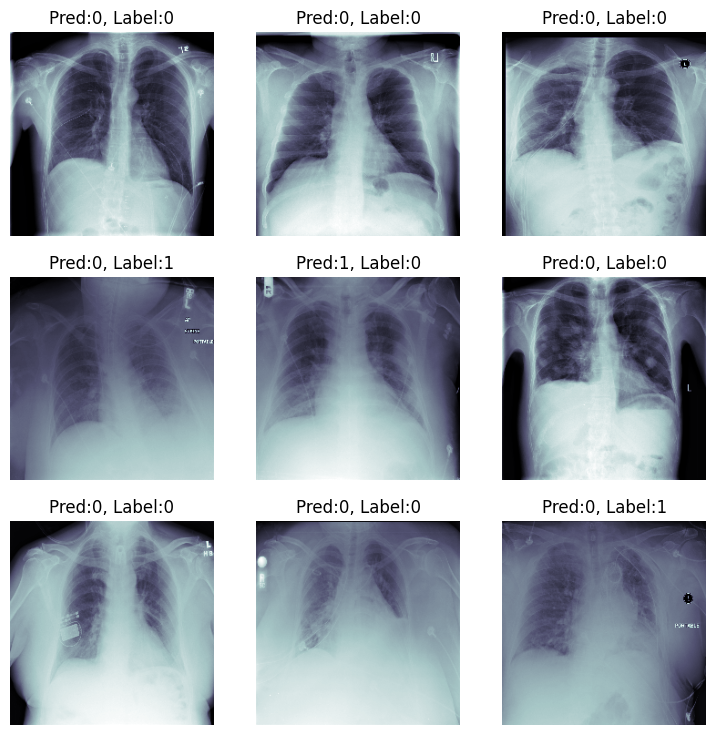

In [38]:
"""  Visualización de subfiguras con una selección aleatoria de imágenes del conjunto de datos de validación, 
junto con la predicción y la etiqueta asociadas a cada imagen."""
fig, axis = plt.subplots(3, 3, figsize=(9, 9))

for i in range(3):
    for j in range(3):
        rnd_idx = np.random.randint(0, len(preds))
        axis[i][j].imshow(val_dataset[rnd_idx][0][0], cmap="bone")
        axis[i][j].set_title(f"Pred:{int(preds[rnd_idx] > 0.5)}, Label:{labels[rnd_idx]}")
        axis[i][j].axis("off")

##Interpretability

In [40]:
# Carga un archivo utilizando la biblioteca NumPy y lo convierte en un arreglo NumPy de tipo np.float32.
def load_file(path):
    return np.load(path).astype(np.float32)


In [41]:
# Prepara los datos de validación para su uso en el modelo
val_transforms = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(0.49, 0.248),

])

val_dataset = torchvision.datasets.DatasetFolder("/content/Processed_npy_files/val", loader=load_file, extensions="npy", transform=val_transforms)

In [44]:
import torchvision.models as models # Importación del módulo Models para cargar modelos pre-entreados

temp_model = models.resnet18(pretrained=True) # crea una instancia del modelo y sus pesos, ResNet-18 pre-entrenado, llamado temp_model
# temp_model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


In [45]:
# Para obtener todas las capas del modelo hasta la capa de promedio global (avgpool) y excluir las dos últimas. (capas antes de la capa de clasificación final.)
list(temp_model.children())[:-2];  # get all layers up to avgpool

In [ ]:
# crea un nuevo modelo con las capas extraidas en la celda anterior (Capa de avgpool)
torch.nn.Sequential(*list(temp_model.children())[:-2]); 

In [47]:
class PneumoniaModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.model = torchvision.models.resnet18() 
        # Change conv1 from 3 to 1 input channels
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # Change out_feature of the last fully connected layer (called fc in resnet18) from 1000 to 1
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1)
        
        # Extract the feature map
        self.feature_map = torch.nn.Sequential(*list(self.model.children())[:-2])    
    def forward(self, data):
        
        # Compute feature map
        feature_map = self.feature_map(data)
        # Use Adaptive Average Pooling as in the original model
        avg_pool_output = torch.nn.functional.adaptive_avg_pool2d(input=feature_map, output_size=(1, 1))
        print(avg_pool_output.shape)
        # Flatten the output into a 512 element vector
        avg_pool_output_flattened = torch.flatten(avg_pool_output)
        print(avg_pool_output_flattened.shape)
        # Compute prediction
        pred = self.model.fc(avg_pool_output_flattened)
        return pred, feature_map
    


In [48]:
def cam(model, img):
    with torch.no_grad():
        pred, features = model(img.unsqueeze(0)) # Inferencia del modelo con imagen expandida en una dimension y se obtienen las prediciones y las caracteristicas.
    features = features.reshape((512, 49)) # Redimensión de 512x49
    weight_params = list(model.model.fc.parameters())[0] # Se accede a los parámetros y se obtiene el primer elemento de la lista de parámetros de peso de la capa fc.
    weight = weight_params[0].detach() # La línea de código extrae y almacena el primer elemento de los parámetros de peso en una variable, 
                                # sin vínculo con su historial de cálculo o gradiente (sin rastrear ninguna operación que se realice en ellos).
    
    cam = torch.matmul(weight, features) # Multiplicación matricial entre los pesos y las características para obtener el mapa de activación de clase cam
    cam_img = cam.reshape(7, 7).cpu() # El código redimensiona el mapa de activación de clase para obtener una imagen de tamaño (7, 7) y lo mueve a la CPU.
    return cam_img, torch.sigmoid(pred) # devuelve la imagen del mapa de activación y el valor de predicción después de aplicar la función sigmoide.

In [49]:
# Use strict to prevent pytorch from loading weights for self.feature_map
model = PneumoniaModel.load_from_checkpoint("weights/weights_1.ckpt", strict=False)
model.eval();

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:158: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['feature_map.0.weight', 'feature_map.1.weight', 'feature_map.1.bias', 'feature_map.1.running_mean', 'feature_map.1.running_var', 'feature_map.4.0.conv1.weight', 'feature_map.4.0.bn1.weight', 'feature_map.4.0.bn1.bias', 'feature_map.4.0.bn1.running_mean', 'feature_map.4.0.bn1.running_var', 'feature_map.4.0.conv2.weight', 'feature_map.4.0.bn2.weight', 'feature_map.4.0.bn2.bias', 'feature_map.4.0.bn2.running_mean', 'feature_map.4.0.bn2.running_var', 'feature_map.4.1.conv1.weight', 'feature_map.4.1.bn1.weight', 'feature_map.4.1.bn1.bias', 'feature_map.4.1.bn1.running_mean', 'feature_map.4.1.bn1.running_var', 'feature_map.4.1.conv2.weight', 'feature_map.4.1.bn2.weight', 'feature_map.4.1.bn2.bias', 'feature_map.4.1.bn2.running_mean', 'feature_map.4.1.bn2.running_var', 'feature_map.5.0.conv1.weight', 'feature_map.5.0.bn1.weight', 'f

### CAM

In [50]:
def cam(model, img):
    """
    Compute class activation map according to cam algorithm
    """
    with torch.no_grad():
        pred, features = model(img.unsqueeze(0))
    b, c, h, w = features.shape
    # print(b,c,h,w)

    # We reshape the 512x7x7 feature tensor into a 512x49 tensor in order to simplify the multiplication
    features = features.reshape((c, h*w))
    
    # Get only the weights, not the bias
    weight_params = list(model.model.fc.parameters())[0] 
    
    # Remove gradient information from weight parameters to enable numpy conversion
    weight = weight_params[0].detach()
    print(weight.shape)
    # Compute multiplication between weight and features with the formula from above.
    # We use matmul because it directly multiplies each filter with the weights
    # and then computes the sum. This yields a vector of 49 (7x7 elements)
    cam = torch.matmul(weight, features)
    print(features.shape)
    
    ### The following loop performs the same operations in a less optimized way
    #cam = torch.zeros((7 * 7))
    #for i in range(len(cam)):
    #    cam[i] = torch.sum(weight*features[:,i])
    ##################################################################
    
    # Normalize and standardize the class activation map (Not always necessary, thus not shown in the lecture)
    cam = cam - torch.min(cam)
    cam_img = cam / torch.max(cam)
    # Reshape the class activation map to 512x7x7 and move the tensor back to CPU
    cam_img = cam_img.reshape(h, w).cpu()

    return cam_img, torch.sigmoid(pred)


In [51]:
def visualize(img, heatmap, pred):
    """
    Visualization function for class activation maps
    """
    img = img[0]
    # Resize the activation map of size 7x7 to the original image size (224x224)
    heatmap = transforms.functional.resize(heatmap.unsqueeze(0), (img.shape[0], img.shape[1]))[0]
    
    # Create a figure
    fig, axis = plt.subplots(1, 2)
    
    axis[0].imshow(img, cmap="bone")
    # Overlay the original image with the upscaled class activation map
    axis[1].imshow(img, cmap="bone")
    axis[1].imshow(heatmap, alpha=0.5, cmap="jet")
    plt.title(f"Pneumonia: {(pred > 0.5).item()}")

### Demo 

In [52]:
img = val_dataset[-6][0]  # Select a subject
activation_map, pred = cam(model, img)  # Compute the Class activation map given the subject

torch.Size([1, 512, 1, 1])
torch.Size([512])
1 512 7 7
torch.Size([512])
torch.Size([512, 49])


In [59]:
# %matplotlib notebook no funciona correctamente debido a las limitaciones del entorno. En su lugar, se recomienda utilizar %matplotlib inline. 
%matplotlib inline

<IPython.core.display.Javascript object>

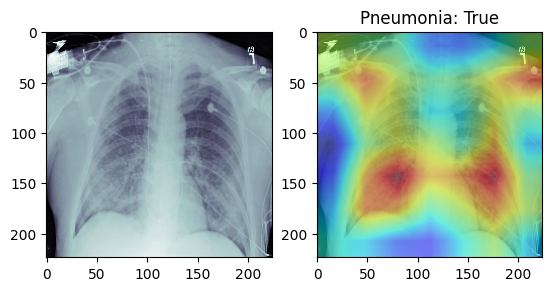

In [60]:
visualize(img, activation_map, pred)  # Visualize CAM